In [25]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = 'data/train'
test_path = 'data/test1'

In [3]:
images = [img for img in os.listdir(train_path)]

In [18]:
X,y = [], []

In [23]:
for img in images:
    label = img.split('.')[0]
    img_no = img.split('.')[1]
    image_path = os.path.join(train_path,img)
    train_img = cv2.imread(image_path)
    scaled_img = cv2.resize(train_img, (64,64))
    std_scaled_img = scaled_img / 255
    X.append(std_scaled_img.flatten())
    if label == 'cat':
        y.append(0)
    else:
        y.append(1)
X = np.asarray(X)

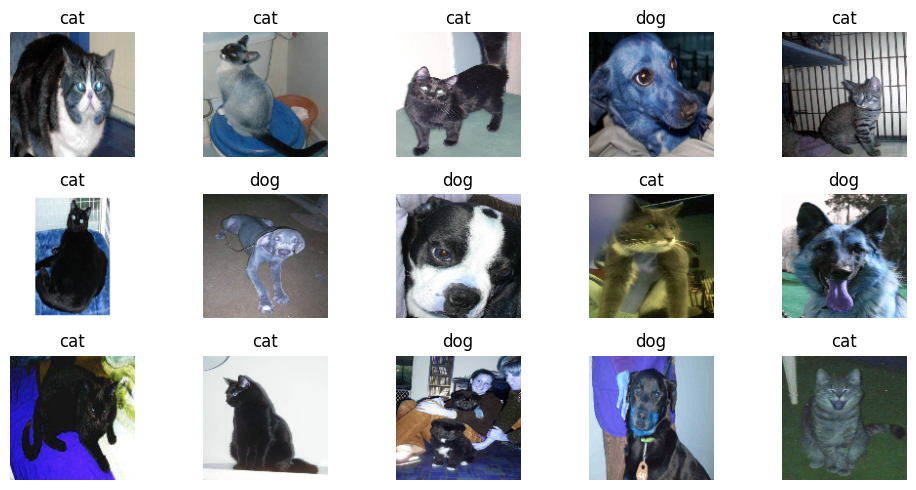

In [36]:
fig, ax = plt.subplots(3, 5, figsize=(10, 5))
    
for i, file in enumerate(random.sample(images,15)):
    row = i // 5
    col = i % 5
    img_path = os.path.join(train_path, file)
    img = cv2.imread(img_path)
    resized = cv2.resize(img, (128,128))
    # Display image
    ax[row, col].imshow(resized)
    ax[row, col].set_title(file.split('.')[0])
    ax[row, col].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [37]:
model = GridSearchCV(SVC(gamma='auto',),{
    'C' : [1,10,50,100],
    'kernel' : ['rbf', 'linear', 'poly', 'sigmoidal']
}, cv = 10, scoring='accuracy')

In [ ]:
model.fit(X, y)

In [ ]:
model.best_params_

In [17]:
model = SVC(random_state=42)
model.fit(X,y)

SVC(random_state=42)

In [23]:
predictions = {
    "ID" : []
}

In [24]:
X_test = []
test_images = [img for img in os.listdir('test1')]

In [25]:
for img in test_images:
    id = img.split('.')[0]
    predictions["ID"].append(id)
    image_path = os.path.join('test1',img)
    test_img = cv2.imread(image_path)
    scaled_test_img = cv2.resize(test_img, (64,64))
    X_test.append(scaled_test_img.flatten())

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [37]:
predictions["ID"]
predictions

{'ID': ['1',
  '10',
  '100',
  '1000',
  '10000',
  '10001',
  '10002',
  '10003',
  '10004',
  '10005',
  '10006',
  '10007',
  '10008',
  '10009',
  '1001',
  '10010',
  '10011',
  '10012',
  '10013',
  '10014',
  '10015',
  '10016',
  '10017',
  '10018',
  '10019',
  '1002',
  '10020',
  '10021',
  '10022',
  '10023',
  '10024',
  '10025',
  '10026',
  '10027',
  '10028',
  '10029',
  '1003',
  '10030',
  '10031',
  '10032',
  '10033',
  '10034',
  '10035',
  '10036',
  '10037',
  '10038',
  '10039',
  '1004',
  '10040',
  '10041',
  '10042',
  '10043',
  '10044',
  '10045',
  '10046',
  '10047',
  '10048',
  '10049',
  '1005',
  '10050',
  '10051',
  '10052',
  '10053',
  '10054',
  '10055',
  '10056',
  '10057',
  '10058',
  '10059',
  '1006',
  '10060',
  '10061',
  '10062',
  '10063',
  '10064',
  '10065',
  '10066',
  '10067',
  '10068',
  '10069',
  '1007',
  '10070',
  '10071',
  '10072',
  '10073',
  '10074',
  '10075',
  '10076',
  '10077',
  '10078',
  '10079',
  '1008',


In [38]:
import pandas as pd

In [39]:
submission = pd.DataFrame(predictions)
submission

,ID,Label
0,1,0
1,10,0
2,100,0
3,1000,0
4,10000,1
...,...,...
12495,9995,1
12496,9996,1
12497,9997,1
12498,9998,0


In [48]:
sorted_submission = submission.sort_values(by='ID')
sorted_submission

,ID,Label
0,1,0
1,10,0
2,100,0
3,1000,0
4,10000,1
...,...,...
12495,9995,1
12496,9996,1
12497,9997,1
12498,9998,0


In [50]:
sorted_submission.to_csv("Submission.csv", index=False)